#  Logistic Regression Using Gradient Descent 

### Dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
from sklearn.datasets import make_blobs
# centers corresponds to number of classes generated in the data. 
X, y =  make_blobs(n_samples=100, centers=[[2,4],[4,2]], random_state=20)

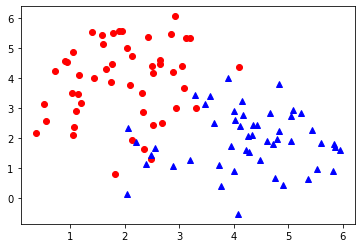

In [3]:
#Visualize dataset 
plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')

In [4]:
len(X)

100

In [5]:
X.shape

(100, 2)

y=np.array(y)

In [6]:
type(X)

numpy.ndarray

### Useful functions

In [7]:
def fetch_sigmoid(z):
    ans=1
    ans/=(1+math.exp(-z))
    return ans

#### Testing sigmoid

x = np.linspace(-5,5,100)
y = [fetch_sigmoid(t) for t in x]

# setting the axes at the centre
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# plot the function
plt.plot(x,y, 'r')

# show the plot
plt.show()

In [8]:
def fetch_loss(y, y_pred):
    curr_loss = -np.mean(y*(np.log(y_pred)) + (1-y)*np.log(1-y_pred))
    return curr_loss

### master function

In [9]:
def get_sigmoid(t):
    return 1.0/(1 + np.exp(-t))

In [10]:
def fetch_der(X, y, y_pred):
    m = X.shape[0]    
    # Sigmoid's serivative = sig ( 1- sig)
    # so, actual derivative = [((y-y_pred) / (y_pred)* (1-y_pred))] * [(y_pred) * (1-y_pred)]
    d_weights = (1/m)*np.dot(X.T, (y_pred - y))
    d_c = (1/m)*np.sum((y_pred - y)) 
    return d_weights, d_c

In [11]:
def log_reg(X, y, num_iterations):
    m, n = X.shape
    ALPHA=0.01
    w = np.zeros((n,1))
    c = 0
    y = y.reshape(m,1)
    losses = []
    for it in range(num_iterations):    
        x_now = X[:]
        y_now = y[:]
        y_predicted = get_sigmoid(np.dot(x_now, w) + c)
        dw, dc = fetch_der(x_now, y_now, y_predicted)
        w -= ALPHA*dw
        c -= ALPHA*dc
        loss_now = fetch_loss(y, get_sigmoid(np.dot(X, w) + c))
        losses.append(loss_now)
    return w, c, losses

In [12]:
weights, bias, l = log_reg(X, y, 100000)

In [13]:
def plot_final(X, w, b):

    x1 = [min(X[:,0]), max(X[:,0])]
    slope = -w[0]/w[1]
    c = -b/w[1]
    x2 = slope*x1 + c
    plt.plot(X[:,0][y==0],X[:,1][y==0],'o',color='red')
    plt.plot(X[:,0][y==1],X[:,1][y==1],'^',color='blue')
    plt.xlim([-0, 6])
    plt.ylim([0, 6])
    plt.plot(x1, x2, 'y-')

In [14]:
len(X)

100

In [15]:
y

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1])

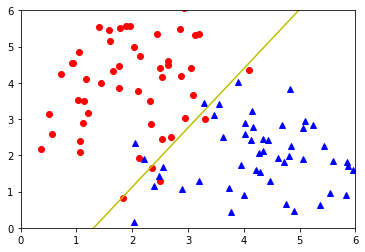

In [16]:
plot_final(X, weights, bias)

In [17]:
weights

array([[ 3.28777724],
       [-2.01195904]])

In [18]:
bias

-4.313884270345971

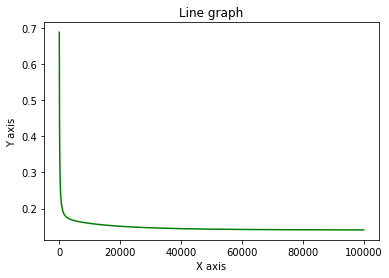

In [19]:
import matplotlib.pyplot as plt
 
# data to be plotted
iteration_number=[]
for i in range(len(l)):
    iteration_number.append(i+1)
# plotting
plt.title("Line graph")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(iteration_number, l, color ="green")
plt.show()